## Classification of Mice Based on Protein Expression Levels

## Problem Statement
The goal of this project is to analyze protein expression levels in the cerebral cortex of mice to classify them into different categories based on their genotype, behavior, and treatment. Specifically, the project aims to identify subsets of proteins that can discriminate between these classes and to understand the biological mechanisms underlying learning and memory, particularly in the context of Down syndrome.

## Data Preprocessing

In [46]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

## Load the Dataset

In [3]:
df = pd.read_csv(r'Data_Cortex_Nuclear.csv')

In [4]:
# Display the first few rows of the dataset
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [5]:
# Check the data types of each column
print(df.dtypes)

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object


## Handling Missing Values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

DYRK1A_N        3
ITSN1_N         3
BDNF_N          3
NR1_N           3
NR2A_N          3
pAKT_N          3
pBRAF_N         3
pCAMKII_N       3
pCREB_N         3
pELK_N          3
pERK_N          3
pJNK_N          3
PKCA_N          3
pMEK_N          3
pNR1_N          3
pNR2A_N         3
pNR2B_N         3
pPKCAB_N        3
pRSK_N          3
AKT_N           3
BRAF_N          3
CAMKII_N        3
CREB_N          3
ELK_N          18
ERK_N           3
GSK3B_N         3
JNK_N           3
MEK_N           7
TRKA_N          3
RSK_N           3
APP_N           3
Bcatenin_N     18
SOD1_N          3
MTOR_N          3
P38_N           3
pMTOR_N         3
DSCR1_N         3
AMPKA_N         3
NR2B_N          3
pNUMB_N         3
RAPTOR_N        3
TIAM1_N         3
pP70S6_N        3
BAD_N         213
BCL2_N        285
pCFOS_N        75
H3AcK18_N     180
EGR1_N        210
H3MeK4_N      270
dtype: int64


In [36]:
# Identify the categorical columns
categorical_columns = ['Genotype', 'Treatment', 'Behavior', 'class']

In [9]:
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        print(f"Column {column} contains non-numeric data.")

Column MouseID contains non-numeric data.
Column Genotype contains non-numeric data.
Column Treatment contains non-numeric data.
Column Behavior contains non-numeric data.
Column class contains non-numeric data.


In [11]:
numeric_data = df.select_dtypes(include=[float, int])

In [13]:
numeric_data.isna().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Length: 77, dtype: int64

In [15]:
df_filled = df.fillna(df.mean(numeric_only=True))

In [37]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [17]:
label_encoder = LabelEncoder()
for column in ['Genotype', 'Treatment', 'Behavior', 'class']:
    df_filled[column] = label_encoder.fit_transform(df_filled[column])

In [25]:
# Verify the encoding
print(df_filled.head())

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0  0.131790  0.128186  1.675652         0          0    

In [26]:
# Verify the encoding
print(df_filled.tail())

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
1075 

## Normalize/Scale the Data

In [27]:
df = df_filled

In [29]:
scaler = StandardScaler()
df.iloc[:, 1:-1] = df.iloc[:, 1:-1].astype(float)
df.iloc[:, 1:-1] = scaler.fit_transform(df.iloc[:, 1:-1])

In [30]:
# Verify the scaling by displaying the first few rows and summary statistics
print(df.head())

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.312711  0.517934  2.253669  1.497362  2.304365 -0.345019   
1   309_2  0.356798  0.286501  1.880279  1.420009  1.976769 -0.518126   
2   309_3  0.334966  0.450465  2.012928  1.124860  1.909149 -0.581298   
3   309_4  0.065474 -0.000103  0.802123  0.489481  1.219245 -0.247424   
4   309_5  0.036682  0.001305  0.805692  0.197652  0.939202 -0.482759   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0 -0.158601  -0.899902  0.604115  ... -0.987371 -0.285744  -1.011615   
1 -0.334523  -0.963018  0.442658  ... -1.162114 -0.067645  -1.063458   
2 -0.226891  -0.969835  0.543335  ... -1.079366 -0.155059  -1.065130   
3 -0.199461  -1.071196 -0.171236  ... -0.860192 -0.818989  -0.723367   
4 -0.304516  -1.085341 -0.627671  ... -0.884881 -0.179502  -0.943378   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0 -1.416624 -1.607891  1.065901 -0.945905  -0.945905 -1.

## Exploratory Data Analysis (EDA)

**Summary Statistics**

In [31]:
# Summary Statistics
summary_stats = df.describe()
print("Summary statistics:")
print(summary_stats)

Summary statistics:
           DYRK1A_N       ITSN1_N        BDNF_N         NR1_N        NR2A_N  \
count  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean  -3.289550e-18  1.315820e-17  6.579099e-18  1.315820e-17 -1.315820e-17   
std    1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00  1.000463e+00   
min   -1.126894e+00 -1.480026e+00 -4.136750e+00 -2.787944e+00 -2.261607e+00   
25%   -5.530238e-01 -5.710522e-01 -6.377946e-01 -6.869100e-01 -7.340226e-01   
50%   -2.381293e-01 -2.020004e-01 -4.839880e-02  6.579099e-16 -8.656902e-02   
75%    2.481466e-01  3.200908e-01  5.873320e-01  6.657037e-01  6.239974e-01   
max    8.399194e+00  7.905131e+00  3.612614e+00  4.212825e+00  4.980423e+00   

            pAKT_N       pBRAF_N     pCAMKII_N       pCREB_N        pELK_N  \
count  1080.000000  1.080000e+03  1.080000e+03  1.080000e+03  1.080000e+03   
mean      0.000000 -1.315820e-17  3.289550e-17  5.263280e-17  1.973730e-17   
std       1.000463  1.000463e+00  

In [32]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.312711,0.517934,2.253669,1.497362,2.304365,-0.345019,-0.158601,-0.899902,0.604115,...,-0.987371,-0.285744,-1.011615,-1.416624,-1.607891,1.065901,-0.945905,-0.945905,-1.028175,0
1,309_2,0.356798,0.286501,1.880279,1.420009,1.976769,-0.518126,-0.334523,-0.963018,0.442658,...,-1.162114,-0.067645,-1.063458,-1.325218,-1.546844,1.280291,-0.945905,-0.945905,-1.028175,0
2,309_3,0.334966,0.450465,2.012928,1.124860,1.909149,-0.581298,-0.226891,-0.969835,0.543335,...,-1.079366,-0.155059,-1.065130,-1.373257,-1.623595,1.857038,-0.945905,-0.945905,-1.028175,0
3,309_4,0.065474,-0.000103,0.802123,0.489481,1.219245,-0.247424,-0.199461,-1.071196,-0.171236,...,-0.860192,-0.818989,-0.723367,-0.984718,-1.218364,1.144490,-0.945905,-0.945905,-1.028175,0
4,309_5,0.036682,0.001305,0.805692,0.197652,0.939202,-0.482759,-0.304516,-1.085341,-0.627671,...,-0.884881,-0.179502,-0.943378,-1.181435,-1.187585,1.583530,-0.945905,-0.945905,-1.028175,0


In [33]:
df.shape

(1080, 82)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR2B_N       

In [35]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
count,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1080.000000,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,...,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1080.000000,1.080000e+03,1.080000e+03,1080.000000
mean,-3.289550e-18,1.315820e-17,6.579099e-18,1.315820e-17,-1.315820e-17,0.000000,-1.315820e-17,3.289550e-17,5.263280e-17,1.973730e-17,...,-2.631640e-17,-1.315820e-17,-3.947460e-17,-1.315820e-17,1.315820e-17,-3.947460e-17,0.000000,2.631640e-17,6.579099e-17,3.388889
std,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,...,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463e+00,1.000463,1.000463e+00,1.000463e+00,2.319812
min,-1.126894e+00,-1.480026e+00,-4.136750e+00,-2.787944e+00,-2.261607e+00,-4.089102,-4.364404e+00,-1.696445e+00,-3.067092e+00,-2.144995e+00,...,-1.983415e+00,-2.822940e+00,-1.659116e+00,-2.140954e+00,-2.157326e+00,-2.370201e+00,-0.945905,-9.459053e-01,-1.028175e+00,0.000000
25%,-5.530238e-01,-5.710522e-01,-6.377946e-01,-6.869100e-01,-7.340226e-01,-0.658060,-6.382551e-01,-8.178170e-01,-6.685676e-01,-4.769837e-01,...,-7.249663e-01,-7.227359e-01,-6.576060e-01,-6.612472e-01,-6.487204e-01,-8.087621e-01,-0.945905,-9.459053e-01,-1.028175e+00,1.000000
50%,-2.381293e-01,-2.020004e-01,-4.839880e-02,6.579099e-16,-8.656902e-02,-0.046252,1.567793e-02,-1.604965e-01,-5.819895e-02,-1.551663e-01,...,-1.124242e-01,3.592686e-02,3.157968e-16,-2.369996e-17,3.145141e-16,-6.417740e-02,-0.945905,-9.459053e-01,9.725975e-01,3.000000
75%,2.481466e-01,3.200908e-01,5.873320e-01,6.657037e-01,6.239974e-01,0.578876,5.697940e-01,7.298624e-01,6.758712e-01,2.837720e-01,...,4.943735e-01,6.731796e-01,3.240854e-01,3.586435e-01,2.872745e-01,7.825111e-01,1.057188,1.057188e+00,9.725975e-01,5.250000
max,8.399194e+00,7.905131e+00,3.612614e+00,4.212825e+00,4.980423e+00,7.360485,5.009606e+00,3.037636e+00,2.879896e+00,1.005211e+01,...,5.453639e+00,4.721519e+00,5.722766e+00,4.898913e+00,4.338753e+00,2.498608e+00,1.057188,1.057188e+00,9.725975e-01,7.000000


## Visualization ##

Histograms for each feature:


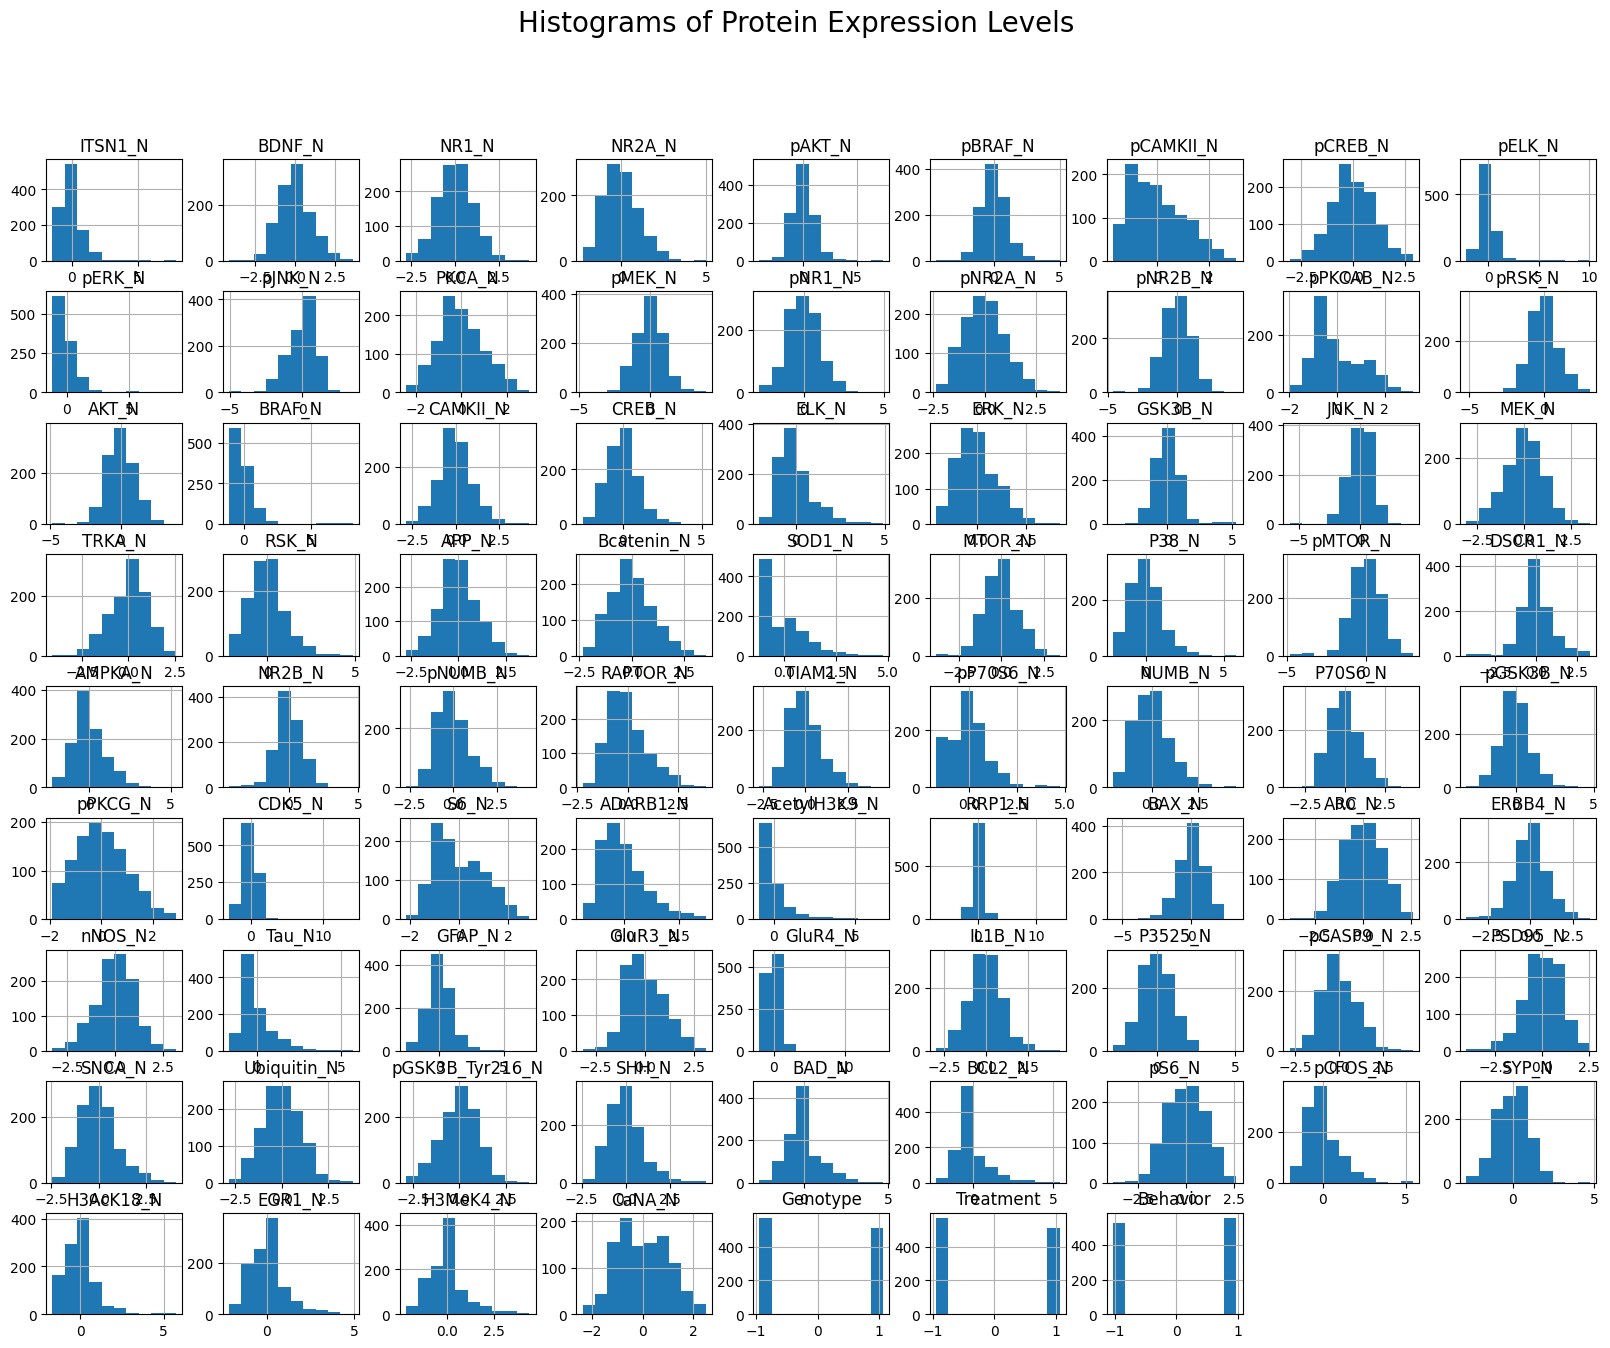

In [36]:
# Histograms for each feature
print("Histograms for each feature:")
df.iloc[:, 2:-1].hist(figsize=(20, 15))
plt.suptitle('Histograms of Protein Expression Levels', fontsize=20)
plt.show()

Box plots for each feature:


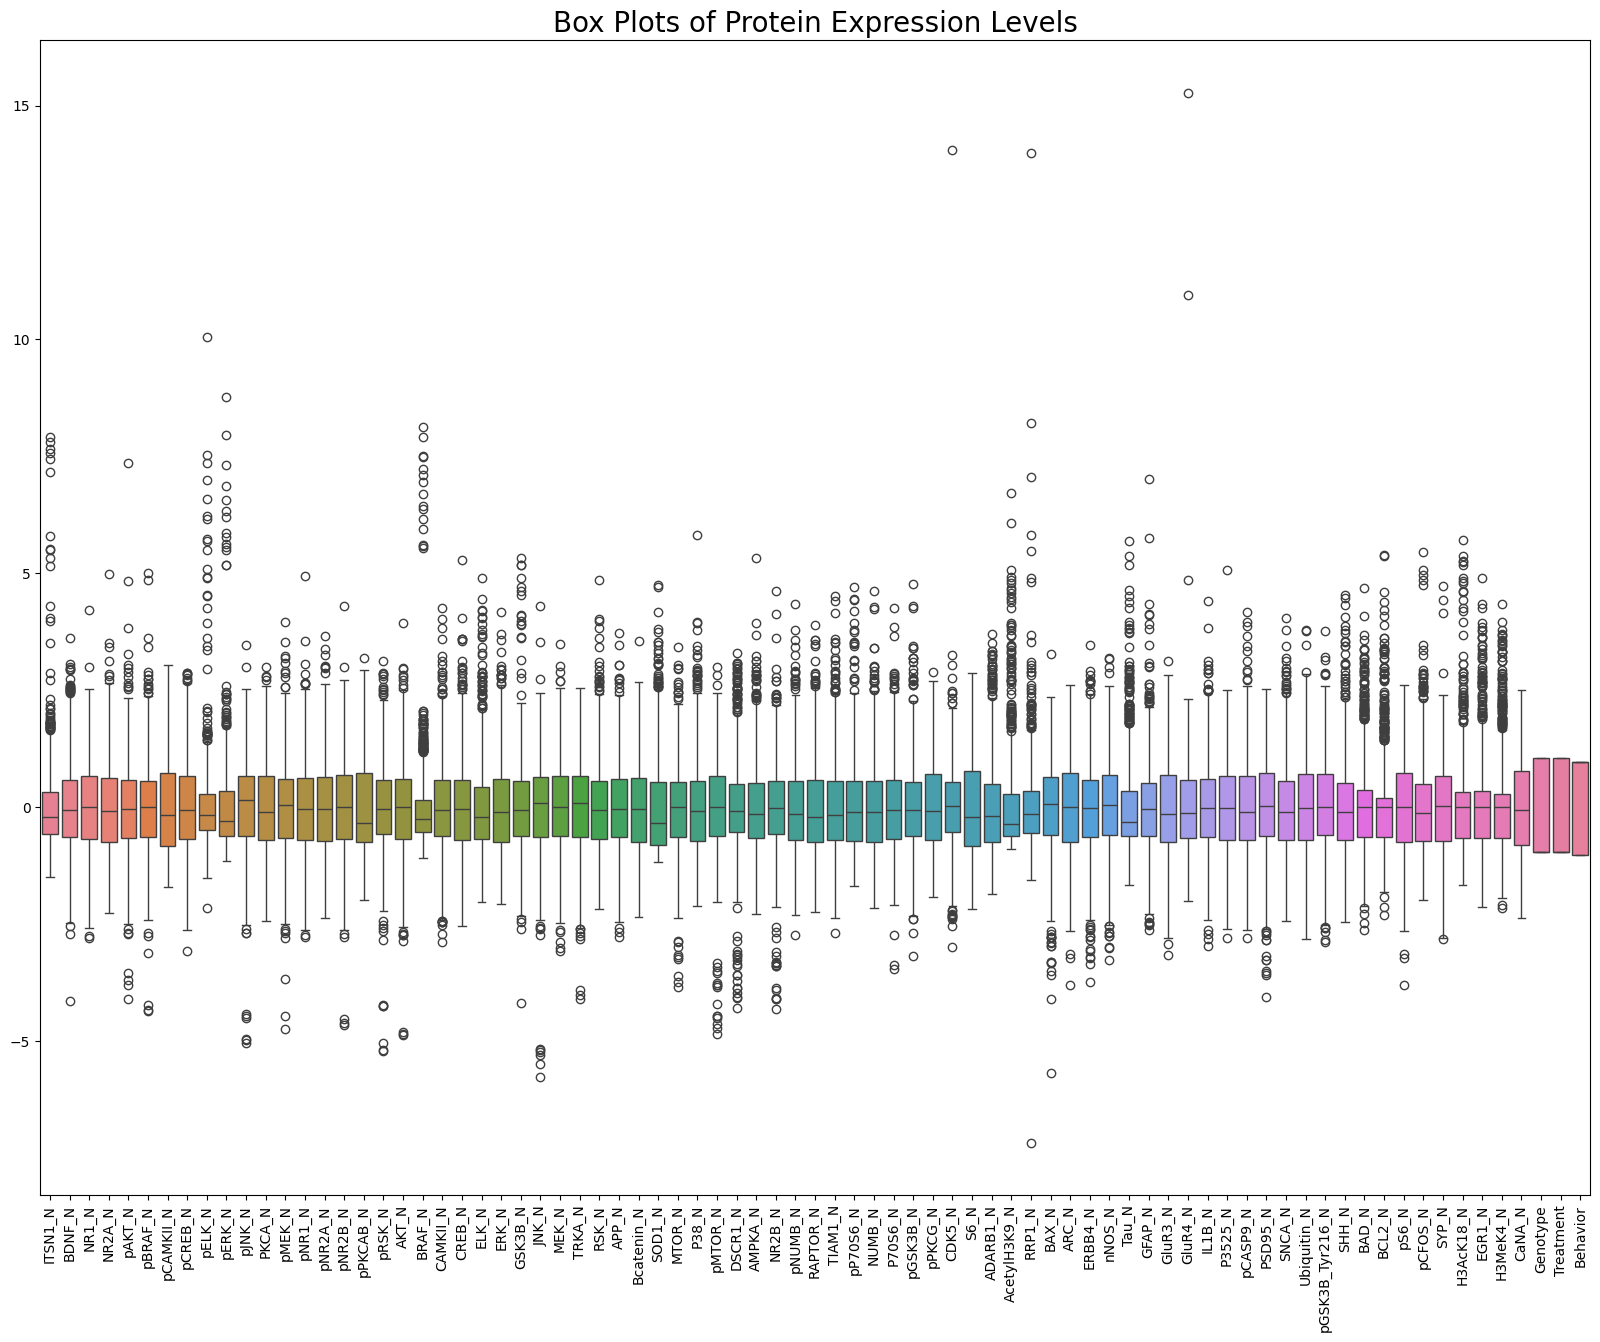

In [37]:
# Box plots for each feature
print("Box plots for each feature:")
plt.figure(figsize=(20, 15))
sns.boxplot(data=df.iloc[:, 2:-1])
plt.xticks(rotation=90)
plt.title('Box Plots of Protein Expression Levels', fontsize=20)
plt.show()

Correlation matrix:


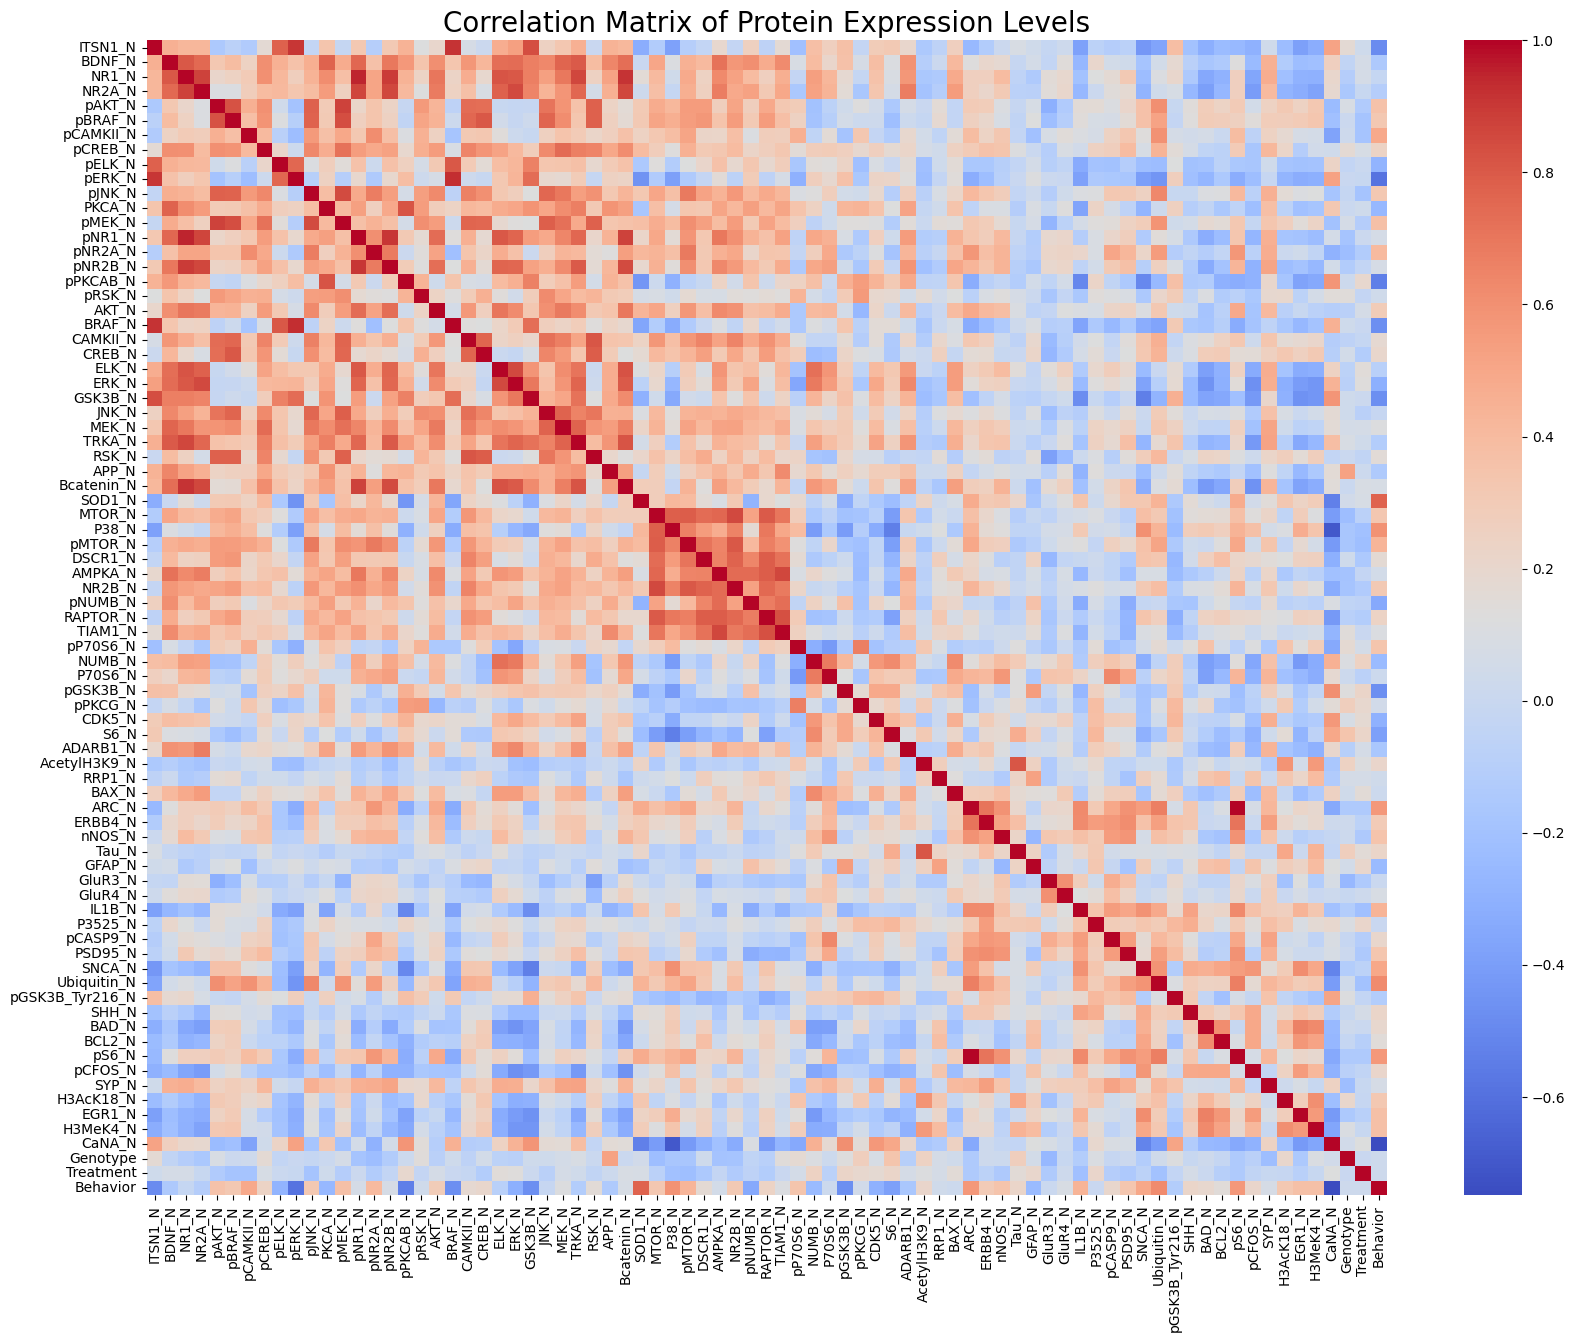

In [38]:
# Correlation Matrix
print("Correlation matrix:")
correlation_matrix = df.iloc[:, 2:-1].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Protein Expression Levels', fontsize=20)
plt.show()

## Feature Selection and Model Training

In [104]:
preprocessed_file_path = 'preprocessed_data.csv'
df.to_csv(preprocessed_file_path, index=False)
print(f"Preprocessed dataset saved to {preprocessed_file_path}")

Preprocessed dataset saved to preprocessed_data.csv


In [116]:
feature_columns = df.columns[1:78]  # Assuming columns 1 to 77 are the protein expression levels
target_column = 'class'

In [118]:
X = df[feature_columns]
y = df[target_column]

In [126]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [128]:
rf_classifier.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [129]:
y_pred = rf_classifier.predict(X_test)

In [131]:
# Get feature importances
importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

In [94]:
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

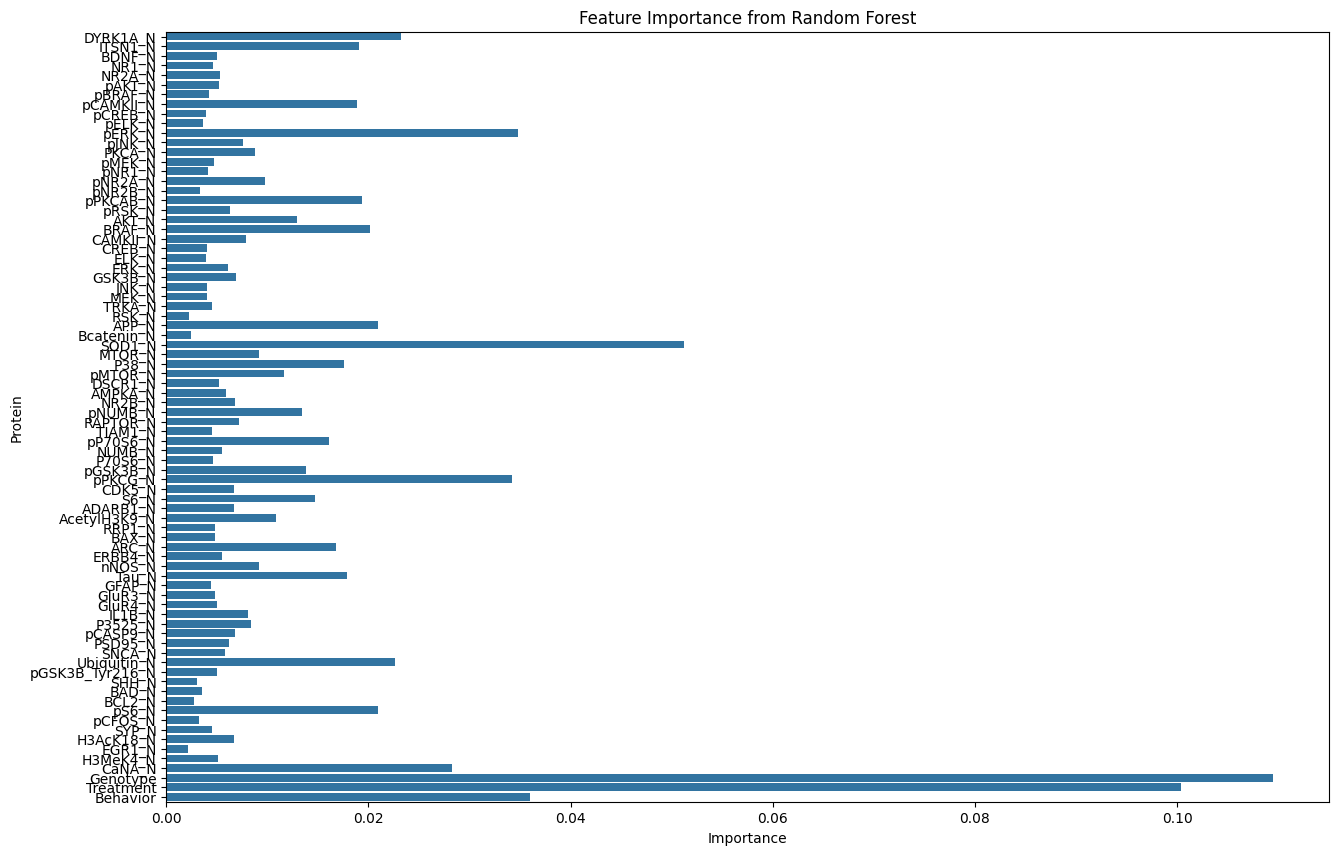

In [95]:
# Visualize the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Protein', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [52]:
top_10_proteins = importance_df_sorted.head(10)
top_10_proteins

,Protein,Importance
77,Genotype,0.109530
78,Treatment,0.100380
32,SOD1_N,0.051241
79,Behavior,0.035979
10,pERK_N,0.034831
46,pPKCG_N,0.034214
76,CaNA_N,0.028241
0,DYRK1A_N,0.023214
65,Ubiquitin_N,0.022585
30,APP_N,0.020993


In [57]:
top_10_proteins.size

20

## Feature selection using RFE

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [63]:
# Get the selected feature names
rfe = RFE(estimator=model, n_features_to_select=20)  # Further reduce to 20 features
rfe.fit(X, y)
top_20_proteins = X.columns[rfe.support_]
print("Selected Features from RFE:", top_20_proteins)

Selected Features from RFE: Index(['DYRK1A_N', 'pCAMKII_N', 'pERK_N', 'pPKCAB_N', 'AKT_N', 'BRAF_N',
       'APP_N', 'SOD1_N', 'P38_N', 'pP70S6_N', 'pPKCG_N', 'S6_N', 'ARC_N',
       'Tau_N', 'Ubiquitin_N', 'pS6_N', 'CaNA_N', 'Genotype', 'Treatment',
       'Behavior'],
      dtype='object')


In [65]:
X_selected = X[top_20_proteins]

In [83]:
X_selected.columns

Index(['DYRK1A_N', 'pCAMKII_N', 'pERK_N', 'pPKCAB_N', 'AKT_N', 'BRAF_N',
       'APP_N', 'SOD1_N', 'P38_N', 'pP70S6_N', 'pPKCG_N', 'S6_N', 'ARC_N',
       'Tau_N', 'Ubiquitin_N', 'pS6_N', 'CaNA_N', 'Genotype', 'Treatment',
       'Behavior'],
      dtype='object')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Now using the Random forest again using the important features

In [67]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = rf_classifier.predict(X_test)

In [70]:
X_test_with_ids = data_filled.loc[X_test.index, ['MouseID']]
X_test_with_ids['Predicted_Class'] = label_encoder.inverse_transform(y_pred)

In [71]:
final_output = X_test_with_ids[['MouseID', 'Predicted_Class']]
print(final_output)

       MouseID Predicted_Class
423   50810F_4          c-CS-s
548     3516_9          c-SC-s
731    3411_12          t-SC-m
588     3416_4          t-CS-m
1051   J1291_2          t-SC-s
...        ...             ...
843    18899_4          t-CS-s
916   50810C_2          t-CS-s
753     3501_4          t-SC-m
409   50810D_5          c-CS-s
275      364_6          c-SC-m

[216 rows x 2 columns]


In [72]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [73]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        31

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



## Now training the model with Neural Networks

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
models = [
    MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=200, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', max_iter=200, random_state=42),
    MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', max_iter=200, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', max_iter=200, random_state=42),
    MLPClassifier(hidden_layer_sizes=(100, 100, 50), activation='relu', max_iter=200, random_state=42)
]

for i, model in enumerate(models, 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model {i} Accuracy: {accuracy:.4f}")


Model 1 Accuracy: 1.0000
Model 2 Accuracy: 1.0000
Model 3 Accuracy: 1.0000
Model 4 Accuracy: 1.0000
Model 5 Accuracy: 1.0000
